In [1]:
import numpy as np
import pandas as pd

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hafeezabro/ushape")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████████████| 2.68k/2.68k [00:00<?, ?B/s]

Extracting files...
Path to dataset files: C:\Users\itsam\.cache\kagglehub\datasets\hafeezabro\ushape\versions\1


In [3]:
df = pd.read_csv('ushape.csv')

In [5]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [6]:
df = df.rename(columns={"3.159499363321345566e-02": "X", "9.869877579082642072e-01": "Y" , "0.000000000000000000e+00" : "class"})

In [7]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [9]:
import matplotlib.pyplot as plt

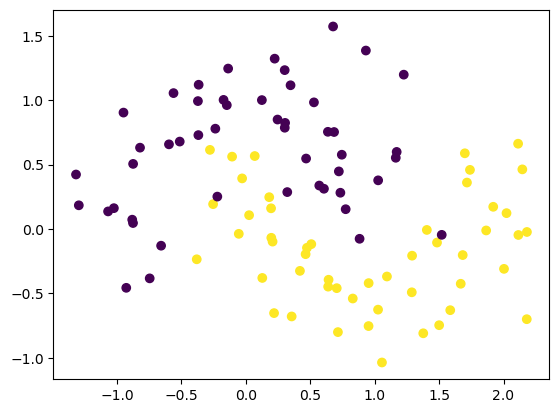

In [12]:
plt.scatter(df['X'] , df['Y'], c=df['class'])

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
y

0     1.0
1     0.0
2     1.0
3     1.0
4     1.0
     ... 
94    1.0
95    1.0
96    1.0
97    0.0
98    0.0
Name: class, Length: 99, dtype: float64

In [16]:
import tensorflow

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(2, activation='relu' , input_dim=2))
model.add(Dense(1, activation='sigmoid'))

C:\Users\itsam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.get_weights()

[array([[-1.00236   ,  0.19124639],
        [ 1.1651887 ,  0.9707657 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.6600324],
        [-0.9827806]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
initial_weights  = model.get_weights()

In [26]:
# Get the current weights of the model
weights = model.get_weights()

# Create initial_weights list with zeros of the same shape as the original weights
initial_weights = []
for i in range(len(weights)):
    # Create a zero array with the same shape as the corresponding weight
    initial_weights.append(np.zeros(weights[i].shape))


In [41]:
X =np.array(X)

In [45]:
y = np.array(y)

In [ ]:
# initial_weights[0] = np.zeros(model.get_weights(model.get_weights()[0].shape))
# initial_weights[1] = np.zeros(model.get_weights(model.get_weights()[1].shape))
# initial_weights[2] = np.zeros(model.get_weights(model.get_weights()[2].shape))
# initial_weights[3] = np.zeros(model.get_weights(model.get_weights()[3].shape))

In [28]:
model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [32]:
history = model.fit(X , y , epochs=100 , validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.4563 - loss: 0.7109 - val_accuracy: 0.5000 - val_loss: 0.7987
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6124 - loss: 0.7034 - val_accuracy: 0.5000 - val_loss: 0.7959
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6163 - loss: 0.7032 - val_accuracy: 0.5000 - val_loss: 0.7932
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6358 - loss: 0.7006 - val_accuracy: 0.5000 - val_loss: 0.7903
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6163 - loss: 0.6958 - val_accuracy: 0.5000 - val_loss: 0.7874
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6383 - loss: 0.6890 - val_accuracy: 0.5000 - val_loss: 0.7846
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5914 - loss: 0.7062 - val_accuracy: 0.5000 - val_loss: 0.7817
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6422 - loss: 0.6809 - val_accuracy: 0.5000 - val_loss

In [34]:
model.get_weights()

[array([[-0.79850405, -0.05904796],
        [ 0.9605549 ,  1.2069579 ]], dtype=float32),
 array([-0.21422513,  0.13858981], dtype=float32),
 array([[ 0.44801912],
        [-1.2191316 ]], dtype=float32),
 array([0.18018498], dtype=float32)]

In [36]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 718us/step


<Axes: >

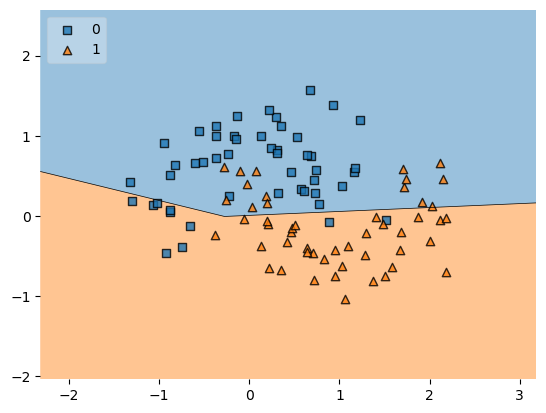

In [46]:
plot_decision_regions (X,y.astype('int') , clf=model , legend=2)